# Introduction to Linear Regression - Theory

In this notebook, we will use regression to fit a model to data.   

Linear regression ia a very simple approach for supervised learning. In particular, linear regression is useful tool for predicting a quantitative response. Though it may seem somewhat dull compared to some of the more modern statistical learning approaches, linear regression is still a useful and widley used statistical learining mehtod.  
Moreover, it serves as a good jumping-off point for newer approaches: as we will see in later tutorials, many fancy statistical learning approaches can be seen as generalizations or extentions of linear regression.


In [1]:
%matplotlib inline

# Standard imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# We do this to ignore several specific warnings
import warnings
warnings.filterwarnings("ignore")

sns.set(style="white")

In [2]:
# Load Data Set
df = sns.load_dataset('tips')

# Display several random rown:
df.sample(5)

,total_bill,tip,sex,smoker,day,time,size
74,14.73,2.20,Female,No,Sat,Dinner,2
53,9.94,1.56,Male,No,Sun,Dinner,2
162,16.21,2.00,Female,No,Sun,Dinner,3
24,19.82,3.18,Male,No,Sat,Dinner,2
186,20.90,3.50,Female,Yes,Sun,Dinner,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [5]:
df.groupby('sex').describe().T

sex                     Male     Female
total_bill count  157.000000  87.000000
           mean    20.744076  18.056897
           std      9.246469   8.009209
           min      7.250000   3.070000
           25%     14.000000  12.750000
           50%     18.350000  16.400000
           75%     24.710000  21.520000
           max     50.810000  44.300000
tip        count  157.000000  87.000000
           mean     3.089618   2.833448
           std      1.489102   1.159495
           min      1.000000   1.000000
           25%      2.000000   2.000000
           50%      3.000000   2.750000
           75%      3.760000   3.500000
           max     10.000000   6.500000
size       count  157.000000  87.000000
           mean     2.630573   2.459770
           std      0.955997   0.937644
           min      1.000000   1.000000
           25%      2.000000   2.000000
           50%      2.000000   2.000000
           75%      3.000000   3.000000
           max      6.000000   6.000000

In [6]:
(df['tip']/df['total_bill']).describe()

count    244.000000
mean       0.160803
std        0.061072
min        0.035638
25%        0.129127
50%        0.154770
75%        0.191475
max        0.710345
dtype: float64

## Simple Linear Regression

The aim of regression is to find the linear relationship between two variables. This is in turn translated into a mathematical problem of finding the equation of the line that is closest to all points observed.

In the following example we compute a simple regression to predict `tip` feature (also known in regression terminology as dependent variable, explained variable or response) from the `total_bill` feature (or independent variable, explanatory varible, control variable)

In [7]:
# Perform simple linear regression
from scipy import stats as sts

# Extract one-dimensional numpy arrays for our features
x = df.total_bill.to_numpy() # independent variable
y = df.tip.to_numpy() # dependent variable

# Compute linear model
slope, intercept, r_value, p_value, slope_std_error = sts.linregress(x, y)

# Display Results
print(f'Best fit line: y ={slope:4.2f} x + {intercept:5.3f}')
print(f'Pearsonr correlation = {r_value:5.3f}\n')

Best fit line: y =0.11 x + 0.920
Pearsonr correlation = 0.676



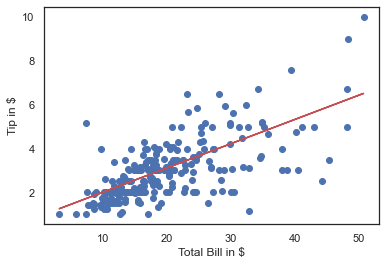

In [8]:
# Plot results
plt.scatter(x, y)
plt.xlabel('Total Bill in \$')
plt.ylabel('Tip in \$')
y_= 0.11*x + 0.920
plt.plot(x, y_, 'r-');

## Basic Concepts and Maths

Mathematically, we express a simple linear regression model in the following form:

$f(x_i) = \beta * x_i + \alpha + \epsilon_i$

where: 
* $f(x)$ is the prediction,
* $\alpha$ is the intercept, also known as the bias in manchine learning,
* $\beta$ is the slope or weight
* $\alpha$ and $\beta$ together are the parameters 
* $\epsilon_i$ accounts for the difference between the model and the data for each data point $(x_i, y_i)$.

If we have a perfect model, these errors, $\epsilon_i$, are all zero, and $y_i = f(x_i)$. In real life, however, the error terms rarely vanish because even if the original relationship is perfect noise creeps into the measurement process. 

Our goal is to find statistically significant values of the parameters $\alpha$ and $\beta$ that minimise the difference between $y_i$ and $f(x_i)$.

We have several potential cost (or loss) functions that we could seek to minimize, but we will use the common $L_2-norm$:

$\epsilon_i^2 = \left( \ y_i - f(x_i) \ \right)^2$. 

We will not go through the derivation here, but using calculus we can show that the values of the unknown parameters are as follows:

$$\beta = \frac{\sum_i(X_i - \bar{X})(Y_i - \bar{Y})}{\sum_i(X_i - \bar{X})^2}$$

$$\alpha = \bar{Y} - \beta \ast \bar{X}$$

where $\bar{X}$ is the mean of X values and $\bar{Y}$ is the mean of Y values.

If you are familiar with statistics, you may recognise $\beta$ as simply
Cov(X, Y) / Var(X).

## Linear Regression From Scratch

Knowing how the packages work behind the scenes is important so you are not just blindly implementing the models. So let's apply the above theory to the Anscombe's quartet dataset:

In [9]:
# Load Anscombe's Quartet
adf = sns.load_dataset('anscombe')

# Select only the first data set
adfi = adf[adf.dataset == 'I']

In [15]:
# Extract the x & y coluns as Numpy arrays,
# we call them xx and yy to avoid conflict with the tips data
xx = adfi['x'].to_numpy()
yy = adfi['y'].to_numpy()

# Number of data points
n = xx.shape[0]

# Determine mean values:
mux = np.mean(xx)
muy = np.mean(yy)

# Determine best fit model parameters (from simple linear regression)
beta = (np.sum(xx - mux) * (yy - muy)) / np.sum((xx - mux)**2)
alpha = muy - beta *mux

Minimial Cost (l2 Norm) = 13.76


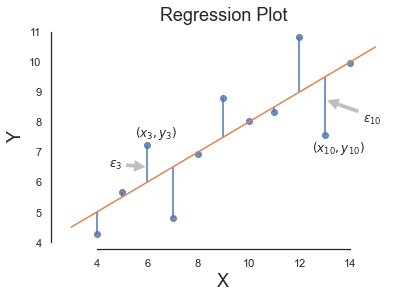

In [17]:

# Number of data points
n = xx.shape[0]

# Determine mean values
mux = np.mean(xx)
muy = np.mean(yy)

# Determine best fit model parameters (from simple linear regression)
beta = np.sum((xx - mux) * (yy - muy)) / np.sum((xx - mux)**2)
alpha = muy - beta * mux

# Plot the data as a Regression Plot
ax = sns.regplot(x='x', y='y', data=adfi, fit_reg=False)

# Label plot
ax.set_xlabel('X', fontsize=18)
ax.set_ylabel('Y', fontsize=18)
ax.set_title('Regression Plot', fontsize=18)

# Compute and draw epsilons
fy = beta * xx + alpha
ax.vlines(xx, yy, fy)

print(f'Minimial Cost (l2 Norm) = {np.sum((fy - yy)**2):5.2f}')

# Annotate third point
ax.annotate(r'$(x_3, y_3)$', xy=(6, 7), xytext=(5.5, 7.5))

ax.annotate(r'$\epsilon_3$', xy=(6, 6.5), xytext=(4.5, 6.5),
            arrowprops=dict(facecolor='black', alpha =0.25, shrink = 0.05))

# Annotate tenth point
ax.annotate(r'$(x_{10}, y_{10})$', xy=(13, 7.5), xytext=(12.5, 7.0))
f
ax.annotate(r'$\epsilon_{10}$', xy=(13, 8.75), xytext=(14.5, 8.0),
            arrowprops=dict(facecolor='black', alpha =0.25, shrink = 0.05))

# Compute and plot linear model
xx = np.arange(3, 16)
yy = beta * xx + alpha
ax.plot(xx, yy)

sns.despine(offset = 5, trim=True)

## Cost Function

This simple example demonstrates a fundamental concept in machine learning, namely the minimization of a cost (or loss) function, which quantifies how well a model represents a data set. For a given data set, the cost function is completely specified by the model parameters, thus a more complex model has a more complex cost function.

In general, we must employ a (potentially) complex mathematical technique to find the (hopefully) global minimum of the cost function. We do this in the following code cell where we generate a grid of values in our two parameters, and compute the cost function for these different parameter combinations.

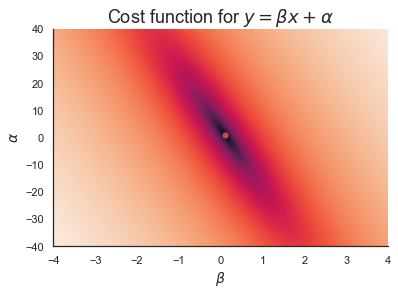

In [18]:
# Define our two-dimensional grid boundaries
beta_low = -4; beta_high = 4
alpha_low = -40; alpha_high = 40

# Number of steps in any direction
steps = 100

# Define our sampling grid for slopes and intercepts
betas, alphas = np.meshgrid(np.linspace(beta_low, beta_high, steps),
                            np.linspace(alpha_low, alpha_high, steps))

# Our cost function: We compute the natural logarithm of the standard
# l2-norm of the model residuals to enhance the scale.
def cost(m, b):
    return np.log(np.sum((y - m * x - b)**2))

# Now vectorize our function
v_cost = np.vectorize(cost)

# Our cost function sampled at every grid point
epsilons = v_cost(betas, alphas)

# Now plot the result
fig, ax = plt.subplots()

# First we draw the OLS result
ax.plot(slope, intercept, marker='o', color='r', markersize=5)

# Now plot the sampled grid as an image
ax.imshow(epsilons, origin='lower', interpolation="gaussian", 
          extent=[beta_low, beta_high, alpha_low, alpha_high], 
          aspect='auto')

# Decorate final plot
ax.set_xlabel(r"$\beta$", fontsize=14)
ax.set_ylabel(r"$\alpha$", fontsize=14)
ax.set_title(r"Cost function for $y = \beta x + \alpha$", fontsize=18)

# Clean up final result
sns.despine(offset=0, trim=True)

As the above two-dimensional image displays, our cost function is not aligned with either parameter, but is steeper in the slope parameter and less steep in the intercept parameter. Thus, we would expect that small changes in the slope will quickly increase our cost (which we saw in the previous one-dimensional example), while small changes in the intercept will produce smaller changes in our cost function (note that the range for intercepts is much larger than the range for the slope parameters).

---

As we move to higher dimensional data sets or more complex cost functions, the challenge of finding the global minimum becomes increasingly difficult. The standard approach is *gradient descent*, where we use the fact that `the first derivative (or gradient) measures the slope of a function at a given point`. We can use the slope to infer which direction is downhill and thus travel towards the minimum.

A major challenge with this approach is the potential to become stuck in a local and not global minima. Thus, modifications are often added to reduce the likelihood of becoming stuck in a local minimum:

* One popular example of this approach is known as `stochastic gradient descent`. This algorithm employs standard gradient descent, but adds an occasional random jump in the parameter space to reduce the chances of being stuck in a local valley.
* Another, very different, approach to this problem is the use of genetic algorithms, which employ techniques from evolutionary biology to minimize the cost function.


Whenever you perform machine learning in the future, you should keep in mind that the model that you generate for a given data set has generally resulted from the minimization of a cost function. Thus, there remains the possibility that with more effort, more data, or a better cost minimization strategy, a new, and better model may potentially exist.